## Load Data from CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [2]:
# Set up paths
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)
output_dir = os.path.join(project_root, "outputs")
os.makedirs(output_dir, exist_ok=True)

In [3]:
# Load and prepare data
df = pd.read_csv(os.path.join(output_dir, 'results.csv'))

## Agregate Results 

In [4]:
df['fairness_score'] = 1 - df['fairness_score']

In [5]:
df = df.groupby(
    ['ml_algorithm', 'fairness_mode', 'alpha_mode', 'alpha_value']
).agg(
    test_accuracy=('test_accuracy', 'mean'),
    fairness_score=('fairness_score', 'mean'),
    var_accuracy=('test_accuracy', 'var'),
    var_fairness=('fairness_score', 'var')
).reset_index()

In [6]:
low_var_ac = (df[df['var_accuracy'] < 0.0001]['var_accuracy'].count() / len(df) * 100).round(2)
print(f"Procentage of accuracy results with variance below 0.0001: {low_var_ac}%")

Procentage of accuracy results with variance below 0.0001: 68.45%


In [7]:
low_var_fair = (df[df['var_fairness'] < 0.0001]['var_fairness'].count() / len(df) * 100).round(2)
print(f"Procentage of fairness results with variance below 0.0001: {low_var_fair}%")

Procentage of fairness results with variance below 0.0001: 39.68%


## Results Tables

In [8]:
# Set column orders for display
columns_order = ['ml_algorithm', 'fairness_mode', 'alpha_mode', 'alpha_value', 'test_accuracy', 'var_accuracy', 'fairness_score', 'var_fairness']

In [9]:
# Group and display results by ML algorithm, fairness mode, alpha mode
for ml in df['ml_algorithm'].unique():
    for fairness in df['fairness_mode'].unique():
        for alpha in df['alpha_mode'].unique():
            subset = df[
                (df['ml_algorithm'] == ml) &
                (df['fairness_mode'] == fairness) &
                (df['alpha_mode'] == alpha)
            ][columns_order]

            if not subset.empty:
                subset[['test_accuracy', 'fairness_score']] = subset[['test_accuracy', 'fairness_score']].round(4)

                print(f"\n=== ML Algorithm: {ml} | Fairness Mode: {fairness} | Alpha Mode: {alpha} ===")
                display(subset.sort_values(by='alpha_value')) 


=== ML Algorithm: LR | Fairness Mode: AE | Alpha Mode: const ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,var_accuracy,fairness_score,var_fairness
0,LR,AE,const,0.00,0.5106,0.007424,0.9484,0.001738
1,LR,AE,const,0.05,0.5374,0.004416,0.9429,0.000912
2,LR,AE,const,0.10,0.5826,0.010633,0.9496,0.001025
3,LR,AE,const,0.15,0.6328,0.011735,0.9245,0.001092
4,LR,AE,const,0.20,0.7011,0.001100,0.9142,0.001671
5,LR,AE,const,0.25,0.7069,0.003112,0.9058,0.001205
6,LR,AE,const,0.30,0.7150,0.001202,0.9019,0.000798
7,LR,AE,const,0.35,0.7381,0.000217,0.8902,0.000294
8,LR,AE,const,0.40,0.7478,0.000214,0.8969,0.000292
9,LR,AE,const,0.45,0.7524,0.000234,0.8901,0.000626



=== ML Algorithm: LR | Fairness Mode: AE | Alpha Mode: linear_decrease ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,var_accuracy,fairness_score,var_fairness
21,LR,AE,linear_decrease,0.00,0.7636,0.000205,0.8812,0.000572
22,LR,AE,linear_decrease,0.05,0.7662,0.000128,0.8781,0.000186
23,LR,AE,linear_decrease,0.10,0.7638,0.000147,0.8833,0.000471
24,LR,AE,linear_decrease,0.15,0.7628,0.000056,0.8849,0.000200
25,LR,AE,linear_decrease,0.20,0.7692,0.000075,0.8774,0.000297
26,LR,AE,linear_decrease,0.25,0.7630,0.000064,0.8861,0.000152
27,LR,AE,linear_decrease,0.30,0.7587,0.000157,0.8926,0.000229
28,LR,AE,linear_decrease,0.35,0.7683,0.000098,0.8784,0.000342
29,LR,AE,linear_decrease,0.40,0.7669,0.000128,0.8789,0.000437
30,LR,AE,linear_decrease,0.45,0.7610,0.000136,0.8953,0.000702



=== ML Algorithm: LR | Fairness Mode: AE | Alpha Mode: linear_increase ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,var_accuracy,fairness_score,var_fairness
42,LR,AE,linear_increase,0.00,0.7683,0.000157,0.8752,0.000397
43,LR,AE,linear_increase,0.05,0.7679,0.000124,0.8759,0.000360
44,LR,AE,linear_increase,0.10,0.7570,0.000122,0.8891,0.000602
45,LR,AE,linear_increase,0.15,0.7583,0.000278,0.8911,0.000822
46,LR,AE,linear_increase,0.20,0.7635,0.000102,0.8797,0.000351
47,LR,AE,linear_increase,0.25,0.7645,0.000074,0.8824,0.000311
48,LR,AE,linear_increase,0.30,0.7685,0.000101,0.8751,0.000407
49,LR,AE,linear_increase,0.35,0.7601,0.000156,0.8849,0.000322
50,LR,AE,linear_increase,0.40,0.7553,0.000249,0.8871,0.000711
51,LR,AE,linear_increase,0.45,0.7715,0.000203,0.8747,0.000554



=== ML Algorithm: LR | Fairness Mode: EO | Alpha Mode: const ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,var_accuracy,fairness_score,var_fairness
63,LR,EO,const,0.00,0.5546,0.010784,0.9729,0.000410
64,LR,EO,const,0.05,0.7657,0.000735,0.9765,0.000569
65,LR,EO,const,0.10,0.7974,0.000025,0.9861,0.000066
66,LR,EO,const,0.15,0.7967,0.000004,0.9828,0.000090
67,LR,EO,const,0.20,0.8003,0.000015,0.9896,0.000073
68,LR,EO,const,0.25,0.8016,0.000036,0.9819,0.000183
69,LR,EO,const,0.30,0.8042,0.000026,0.9839,0.000093
70,LR,EO,const,0.35,0.7997,0.000025,0.9842,0.000069
71,LR,EO,const,0.40,0.8049,0.000009,0.9822,0.000371
72,LR,EO,const,0.45,0.8037,0.000010,0.9654,0.000793



=== ML Algorithm: LR | Fairness Mode: EO | Alpha Mode: linear_decrease ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,var_accuracy,fairness_score,var_fairness
84,LR,EO,linear_decrease,0.00,0.8055,0.000009,0.9845,0.000225
85,LR,EO,linear_decrease,0.05,0.8040,0.000016,0.9777,0.000448
86,LR,EO,linear_decrease,0.10,0.8021,0.000010,0.9781,0.000254
87,LR,EO,linear_decrease,0.15,0.8038,0.000012,0.9865,0.000261
88,LR,EO,linear_decrease,0.20,0.8032,0.000026,0.9775,0.000214
89,LR,EO,linear_decrease,0.25,0.8022,0.000039,0.9766,0.000182
90,LR,EO,linear_decrease,0.30,0.8027,0.000045,0.9750,0.000674
91,LR,EO,linear_decrease,0.35,0.7975,0.000077,0.9772,0.000374
92,LR,EO,linear_decrease,0.40,0.8044,0.000022,0.9836,0.000280
93,LR,EO,linear_decrease,0.45,0.7988,0.000087,0.9827,0.000216



=== ML Algorithm: LR | Fairness Mode: EO | Alpha Mode: linear_increase ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,var_accuracy,fairness_score,var_fairness
105,LR,EO,linear_increase,0.00,0.8019,0.000010,0.9713,0.000634
106,LR,EO,linear_increase,0.05,0.8047,0.000014,0.9903,0.000063
107,LR,EO,linear_increase,0.10,0.8028,0.000014,0.9901,0.000048
108,LR,EO,linear_increase,0.15,0.8063,0.000010,0.9874,0.000222
109,LR,EO,linear_increase,0.20,0.8055,0.000010,0.9919,0.000028
110,LR,EO,linear_increase,0.25,0.8064,0.000005,0.9831,0.000242
111,LR,EO,linear_increase,0.30,0.8050,0.000005,0.9825,0.000242
112,LR,EO,linear_increase,0.35,0.8060,0.000007,0.9851,0.000277
113,LR,EO,linear_increase,0.40,0.8058,0.000004,0.9882,0.000074
114,LR,EO,linear_increase,0.45,0.8058,0.000003,0.9898,0.000108



=== ML Algorithm: LR | Fairness Mode: PE | Alpha Mode: const ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,var_accuracy,fairness_score,var_fairness
126,LR,PE,const,0.00,0.5256,0.030130,0.9812,0.000302
127,LR,PE,const,0.05,0.7898,0.000172,0.9913,0.000026
128,LR,PE,const,0.10,0.7935,0.000048,0.9862,0.000032
129,LR,PE,const,0.15,0.7980,0.000021,0.9886,0.000018
130,LR,PE,const,0.20,0.7966,0.000073,0.9902,0.000040
131,LR,PE,const,0.25,0.7992,0.000027,0.9907,0.000014
132,LR,PE,const,0.30,0.7993,0.000037,0.9890,0.000021
133,LR,PE,const,0.35,0.8024,0.000029,0.9926,0.000010
134,LR,PE,const,0.40,0.8028,0.000022,0.9953,0.000020
135,LR,PE,const,0.45,0.8037,0.000044,0.9950,0.000010



=== ML Algorithm: LR | Fairness Mode: PE | Alpha Mode: linear_decrease ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,var_accuracy,fairness_score,var_fairness
147,LR,PE,linear_decrease,0.00,0.8036,0.000020,0.9915,0.000029
148,LR,PE,linear_decrease,0.05,0.8020,0.000042,0.9937,0.000023
149,LR,PE,linear_decrease,0.10,0.8033,0.000025,0.9930,0.000053
150,LR,PE,linear_decrease,0.15,0.8023,0.000032,0.9933,0.000022
151,LR,PE,linear_decrease,0.20,0.8036,0.000027,0.9925,0.000048
152,LR,PE,linear_decrease,0.25,0.8038,0.000015,0.9964,0.000017
153,LR,PE,linear_decrease,0.30,0.8038,0.000024,0.9958,0.000017
154,LR,PE,linear_decrease,0.35,0.8028,0.000022,0.9933,0.000021
155,LR,PE,linear_decrease,0.40,0.7987,0.000028,0.9933,0.000064
156,LR,PE,linear_decrease,0.45,0.8005,0.000023,0.9943,0.000027



=== ML Algorithm: LR | Fairness Mode: PE | Alpha Mode: linear_increase ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,var_accuracy,fairness_score,var_fairness
168,LR,PE,linear_increase,0.00,0.8018,0.000014,0.9956,0.000011
169,LR,PE,linear_increase,0.05,0.8025,0.000035,0.9944,0.000015
170,LR,PE,linear_increase,0.10,0.8014,0.000021,0.9960,0.000020
171,LR,PE,linear_increase,0.15,0.8017,0.000030,0.9949,0.000013
172,LR,PE,linear_increase,0.20,0.8021,0.000010,0.9961,0.000015
173,LR,PE,linear_increase,0.25,0.8060,0.000004,0.9935,0.000017
174,LR,PE,linear_increase,0.30,0.8047,0.000017,0.9968,0.000011
175,LR,PE,linear_increase,0.35,0.8026,0.000018,0.9948,0.000026
176,LR,PE,linear_increase,0.40,0.8039,0.000008,0.9951,0.000023
177,LR,PE,linear_increase,0.45,0.8047,0.000010,0.9964,0.000008



=== ML Algorithm: LR | Fairness Mode: SP | Alpha Mode: const ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,var_accuracy,fairness_score,var_fairness
189,LR,SP,const,0.00,0.4664,0.007755,0.9841,0.000151
190,LR,SP,const,0.05,0.7633,0.000475,0.9812,0.000204
191,LR,SP,const,0.10,0.7835,0.000277,0.9774,0.000116
192,LR,SP,const,0.15,0.7953,0.000050,0.9767,0.000274
193,LR,SP,const,0.20,0.7943,0.000080,0.9669,0.000100
194,LR,SP,const,0.25,0.7974,0.000012,0.9701,0.000097
195,LR,SP,const,0.30,0.7993,0.000019,0.9682,0.000069
196,LR,SP,const,0.35,0.7980,0.000015,0.9642,0.000095
197,LR,SP,const,0.40,0.7982,0.000023,0.9682,0.000070
198,LR,SP,const,0.45,0.7949,0.000037,0.9736,0.000098



=== ML Algorithm: LR | Fairness Mode: SP | Alpha Mode: linear_decrease ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,var_accuracy,fairness_score,var_fairness
210,LR,SP,linear_decrease,0.00,0.7968,0.000015,0.9725,0.000061
211,LR,SP,linear_decrease,0.05,0.7971,0.000034,0.9729,0.000095
212,LR,SP,linear_decrease,0.10,0.7962,0.000013,0.9737,0.000114
213,LR,SP,linear_decrease,0.15,0.7978,0.000030,0.9698,0.000018
214,LR,SP,linear_decrease,0.20,0.7969,0.000040,0.9696,0.000066
215,LR,SP,linear_decrease,0.25,0.7957,0.000022,0.9752,0.000035
216,LR,SP,linear_decrease,0.30,0.7975,0.000025,0.9726,0.000038
217,LR,SP,linear_decrease,0.35,0.7938,0.000039,0.9755,0.000070
218,LR,SP,linear_decrease,0.40,0.7944,0.000055,0.9724,0.000114
219,LR,SP,linear_decrease,0.45,0.7928,0.000026,0.9719,0.000048



=== ML Algorithm: LR | Fairness Mode: SP | Alpha Mode: linear_increase ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,var_accuracy,fairness_score,var_fairness
231,LR,SP,linear_increase,0.00,0.7978,0.000011,0.9709,0.000063
232,LR,SP,linear_increase,0.05,0.7970,0.000021,0.9753,0.000062
233,LR,SP,linear_increase,0.10,0.7981,0.000016,0.9670,0.000067
234,LR,SP,linear_increase,0.15,0.7977,0.000029,0.9741,0.000049
235,LR,SP,linear_increase,0.20,0.7984,0.000013,0.9695,0.000058
236,LR,SP,linear_increase,0.25,0.7998,0.000012,0.9700,0.000030
237,LR,SP,linear_increase,0.30,0.7998,0.000008,0.9678,0.000065
238,LR,SP,linear_increase,0.35,0.7990,0.000022,0.9703,0.000038
239,LR,SP,linear_increase,0.40,0.8008,0.000021,0.9723,0.000051
240,LR,SP,linear_increase,0.45,0.8000,0.000013,0.9713,0.000023



=== ML Algorithm: MLP | Fairness Mode: AE | Alpha Mode: const ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,var_accuracy,fairness_score,var_fairness
252,MLP,AE,const,0.00,0.4517,0.043603,0.8641,0.004558
253,MLP,AE,const,0.05,0.5893,0.050785,0.8363,0.005858
254,MLP,AE,const,0.10,0.7266,0.019328,0.7949,0.000383
255,MLP,AE,const,0.15,0.7503,0.000455,0.8417,0.003614
256,MLP,AE,const,0.20,0.7638,0.001408,0.8422,0.005994
257,MLP,AE,const,0.25,0.7724,0.000512,0.8398,0.004659
258,MLP,AE,const,0.30,0.7840,0.000913,0.7954,0.003554
259,MLP,AE,const,0.35,0.7811,0.000514,0.8124,0.001320
260,MLP,AE,const,0.40,0.7783,0.000760,0.8612,0.007724
261,MLP,AE,const,0.45,0.7867,0.000427,0.8674,0.003305



=== ML Algorithm: MLP | Fairness Mode: AE | Alpha Mode: linear_decrease ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,var_accuracy,fairness_score,var_fairness
273,MLP,AE,linear_decrease,0.00,0.7944,0.000060,0.8562,0.000656
274,MLP,AE,linear_decrease,0.05,0.7287,0.029056,0.8872,0.002993
275,MLP,AE,linear_decrease,0.10,0.7866,0.000091,0.8867,0.000844
276,MLP,AE,linear_decrease,0.15,0.7801,0.000134,0.9062,0.000831
277,MLP,AE,linear_decrease,0.20,0.7848,0.000318,0.8962,0.001411
278,MLP,AE,linear_decrease,0.25,0.7911,0.000304,0.8712,0.002635
279,MLP,AE,linear_decrease,0.30,0.7897,0.000042,0.8855,0.000242
280,MLP,AE,linear_decrease,0.35,0.7850,0.000040,0.8938,0.001015
281,MLP,AE,linear_decrease,0.40,0.7848,0.000134,0.8955,0.000966
282,MLP,AE,linear_decrease,0.45,0.7931,0.000065,0.8775,0.000213



=== ML Algorithm: MLP | Fairness Mode: AE | Alpha Mode: linear_increase ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,var_accuracy,fairness_score,var_fairness
294,MLP,AE,linear_increase,0.00,0.7833,0.000510,0.8922,0.005597
295,MLP,AE,linear_increase,0.05,0.7895,0.000395,0.8608,0.003297
296,MLP,AE,linear_increase,0.10,0.7904,0.000203,0.8600,0.000830
297,MLP,AE,linear_increase,0.15,0.7930,0.000340,0.8673,0.003567
298,MLP,AE,linear_increase,0.20,0.7950,0.000230,0.8540,0.002512
299,MLP,AE,linear_increase,0.25,0.7889,0.000248,0.8876,0.002300
300,MLP,AE,linear_increase,0.30,0.7951,0.000159,0.8604,0.001992
301,MLP,AE,linear_increase,0.35,0.7885,0.000463,0.8745,0.002681
302,MLP,AE,linear_increase,0.40,0.7875,0.000611,0.8626,0.004423
303,MLP,AE,linear_increase,0.45,0.7838,0.000521,0.8797,0.005100



=== ML Algorithm: MLP | Fairness Mode: EO | Alpha Mode: const ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,var_accuracy,fairness_score,var_fairness
315,MLP,EO,const,0.00,0.5508,0.068850,1.0000,0.000000
316,MLP,EO,const,0.05,0.7541,0.000000,1.0000,0.000000
317,MLP,EO,const,0.10,0.7641,0.000447,0.9984,0.000016
318,MLP,EO,const,0.15,0.7642,0.000458,0.9979,0.000020
319,MLP,EO,const,0.20,0.8101,0.000941,0.9791,0.000419
320,MLP,EO,const,0.25,0.8001,0.001593,0.9895,0.000211
321,MLP,EO,const,0.30,0.8292,0.000702,0.9633,0.000295
322,MLP,EO,const,0.35,0.8307,0.000728,0.9700,0.000445
323,MLP,EO,const,0.40,0.8318,0.000749,0.9779,0.000317
324,MLP,EO,const,0.45,0.8427,0.000002,0.9736,0.000279



=== ML Algorithm: MLP | Fairness Mode: EO | Alpha Mode: linear_decrease ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,var_accuracy,fairness_score,var_fairness
336,MLP,EO,linear_decrease,0.00,0.8418,0.000007,0.9725,0.000118
337,MLP,EO,linear_decrease,0.05,0.8413,0.000005,0.9830,0.000123
338,MLP,EO,linear_decrease,0.10,0.8422,0.000002,0.9798,0.000239
339,MLP,EO,linear_decrease,0.15,0.8416,0.000006,0.9826,0.000182
340,MLP,EO,linear_decrease,0.20,0.8244,0.001377,0.9781,0.000336
341,MLP,EO,linear_decrease,0.25,0.8426,0.000005,0.9806,0.000348
342,MLP,EO,linear_decrease,0.30,0.8418,0.000006,0.9731,0.000252
343,MLP,EO,linear_decrease,0.35,0.8323,0.000760,0.9698,0.000582
344,MLP,EO,linear_decrease,0.40,0.8330,0.000771,0.9765,0.000263
345,MLP,EO,linear_decrease,0.45,0.8408,0.000006,0.9705,0.000299



=== ML Algorithm: MLP | Fairness Mode: EO | Alpha Mode: linear_increase ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,var_accuracy,fairness_score,var_fairness
357,MLP,EO,linear_increase,0.00,0.8425,0.000003,0.9723,0.000414
358,MLP,EO,linear_increase,0.05,0.8242,0.001367,0.9801,0.000641
359,MLP,EO,linear_increase,0.10,0.8336,0.000784,0.9759,0.000516
360,MLP,EO,linear_increase,0.15,0.8431,0.000005,0.9802,0.000141
361,MLP,EO,linear_increase,0.20,0.8426,0.000003,0.9709,0.000433
362,MLP,EO,linear_increase,0.25,0.8342,0.000793,0.9817,0.000339
363,MLP,EO,linear_increase,0.30,0.8425,0.000005,0.9685,0.000371
364,MLP,EO,linear_increase,0.35,0.8307,0.000765,0.9775,0.000294
365,MLP,EO,linear_increase,0.40,0.8432,0.000004,0.9756,0.000346
366,MLP,EO,linear_increase,0.45,0.8356,0.000825,0.9790,0.000243



=== ML Algorithm: MLP | Fairness Mode: PE | Alpha Mode: const ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,var_accuracy,fairness_score,var_fairness
378,MLP,PE,const,0.00,0.5508,6.884976e-02,1.0000,0.000000e+00
379,MLP,PE,const,0.05,0.7648,3.474025e-04,0.9997,3.507820e-07
380,MLP,PE,const,0.10,0.7966,8.725775e-04,0.9945,3.600020e-05
381,MLP,PE,const,0.15,0.8016,1.084360e-03,0.9935,2.962504e-05
382,MLP,PE,const,0.20,0.8183,5.307687e-04,0.9897,3.009747e-05
383,MLP,PE,const,0.25,0.8312,1.186344e-05,0.9857,9.149693e-06
384,MLP,PE,const,0.30,0.8260,6.570891e-04,0.9853,5.791019e-05
385,MLP,PE,const,0.35,0.8355,9.217554e-06,0.9868,2.735335e-05
386,MLP,PE,const,0.40,0.8387,3.766854e-06,0.9781,4.773474e-05
387,MLP,PE,const,0.45,0.8407,8.792026e-06,0.9781,7.821447e-05



=== ML Algorithm: MLP | Fairness Mode: PE | Alpha Mode: linear_decrease ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,var_accuracy,fairness_score,var_fairness
399,MLP,PE,linear_decrease,0.00,0.8417,6.068520e-06,0.9840,0.000065
400,MLP,PE,linear_decrease,0.05,0.8416,2.297571e-06,0.9826,0.000065
401,MLP,PE,linear_decrease,0.10,0.8426,3.241981e-06,0.9800,0.000026
402,MLP,PE,linear_decrease,0.15,0.8420,8.827178e-07,0.9796,0.000054
403,MLP,PE,linear_decrease,0.20,0.8324,7.619826e-04,0.9843,0.000120
404,MLP,PE,linear_decrease,0.25,0.8405,3.995304e-06,0.9821,0.000077
405,MLP,PE,linear_decrease,0.30,0.8396,7.779772e-06,0.9813,0.000064
406,MLP,PE,linear_decrease,0.35,0.8309,7.333009e-04,0.9816,0.000092
407,MLP,PE,linear_decrease,0.40,0.8405,7.040318e-06,0.9835,0.000034
408,MLP,PE,linear_decrease,0.45,0.8382,3.318212e-05,0.9854,0.000109



=== ML Algorithm: MLP | Fairness Mode: PE | Alpha Mode: linear_increase ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,var_accuracy,fairness_score,var_fairness
420,MLP,PE,linear_increase,0.00,0.8407,0.000006,0.9810,0.000077
421,MLP,PE,linear_increase,0.05,0.8424,0.000003,0.9792,0.000116
422,MLP,PE,linear_increase,0.10,0.8423,0.000004,0.9744,0.000071
423,MLP,PE,linear_increase,0.15,0.8420,0.000004,0.9797,0.000089
424,MLP,PE,linear_increase,0.20,0.8338,0.000789,0.9774,0.000165
425,MLP,PE,linear_increase,0.25,0.8419,0.000006,0.9812,0.000014
426,MLP,PE,linear_increase,0.30,0.8435,0.000003,0.9767,0.000091
427,MLP,PE,linear_increase,0.35,0.8422,0.000002,0.9843,0.000060
428,MLP,PE,linear_increase,0.40,0.8424,0.000004,0.9801,0.000036
429,MLP,PE,linear_increase,0.45,0.8424,0.000007,0.9801,0.000082



=== ML Algorithm: MLP | Fairness Mode: SP | Alpha Mode: const ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,var_accuracy,fairness_score,var_fairness
441,MLP,SP,const,0.00,0.4492,6.884976e-02,1.0000,0.000000
442,MLP,SP,const,0.05,0.7541,0.000000e+00,1.0000,0.000000
443,MLP,SP,const,0.10,0.7693,6.020738e-04,0.9888,0.000337
444,MLP,SP,const,0.15,0.7793,7.198855e-04,0.9882,0.000174
445,MLP,SP,const,0.20,0.7983,5.456298e-04,0.9788,0.000212
446,MLP,SP,const,0.25,0.7997,5.827834e-04,0.9856,0.000131
447,MLP,SP,const,0.30,0.8140,1.702935e-05,0.9823,0.000201
448,MLP,SP,const,0.35,0.8188,6.205955e-06,0.9719,0.000065
449,MLP,SP,const,0.40,0.8146,4.767622e-04,0.9769,0.000321
450,MLP,SP,const,0.45,0.8165,4.966887e-04,0.9811,0.000144



=== ML Algorithm: MLP | Fairness Mode: SP | Alpha Mode: linear_decrease ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,var_accuracy,fairness_score,var_fairness
462,MLP,SP,linear_decrease,0.00,0.8212,0.000582,0.9742,0.000267
463,MLP,SP,linear_decrease,0.05,0.8248,0.000011,0.9734,0.000196
464,MLP,SP,linear_decrease,0.10,0.8266,0.000011,0.9779,0.000156
465,MLP,SP,linear_decrease,0.15,0.8225,0.000022,0.9832,0.000128
466,MLP,SP,linear_decrease,0.20,0.8223,0.000004,0.9895,0.000066
467,MLP,SP,linear_decrease,0.25,0.8253,0.000021,0.9798,0.000292
468,MLP,SP,linear_decrease,0.30,0.8226,0.000040,0.9819,0.000098
469,MLP,SP,linear_decrease,0.35,0.8237,0.000006,0.9783,0.000151
470,MLP,SP,linear_decrease,0.40,0.8232,0.000014,0.9846,0.000190
471,MLP,SP,linear_decrease,0.45,0.8136,0.000453,0.9835,0.000131



=== ML Algorithm: MLP | Fairness Mode: SP | Alpha Mode: linear_increase ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,var_accuracy,fairness_score,var_fairness
483,MLP,SP,linear_increase,0.00,0.8126,0.000959,0.9830,0.000170
484,MLP,SP,linear_increase,0.05,0.8252,0.000020,0.9824,0.000214
485,MLP,SP,linear_increase,0.10,0.8277,0.000020,0.9785,0.000208
486,MLP,SP,linear_increase,0.15,0.8196,0.000569,0.9796,0.000157
487,MLP,SP,linear_increase,0.20,0.8222,0.000581,0.9719,0.000323
488,MLP,SP,linear_increase,0.25,0.8230,0.000593,0.9727,0.000338
489,MLP,SP,linear_increase,0.30,0.8286,0.000013,0.9759,0.000117
490,MLP,SP,linear_increase,0.35,0.8323,0.000012,0.9646,0.000245
491,MLP,SP,linear_increase,0.40,0.8298,0.000016,0.9714,0.000295
492,MLP,SP,linear_increase,0.45,0.8303,0.000035,0.9686,0.000338


In [10]:
df.groupby('ml_algorithm')[['test_accuracy', 'fairness_score']].agg(['min', 'median', 'mean', 'var', 'max']).round(4)

test_accuracy                                 fairness_score  \
                       min  median    mean     var     max            min   
ml_algorithm                                                                
LR                  0.4664  0.7993  0.7851  0.0021  0.8178         0.7084   
MLP                 0.4492  0.8306  0.8152  0.0025  0.8493         0.7411   

                                              
              median    mean     var     max  
ml_algorithm                                  
LR            0.9729  0.9521  0.0028  0.9979  
MLP           0.9743  0.9427  0.0035  1.0000

In [11]:
df.groupby('fairness_mode')[['test_accuracy', 'fairness_score']].agg(['min', 'median', 'mean', 'var', 'max']).round(4)

test_accuracy                                 fairness_score  \
                        min  median    mean     var     max            min   
fairness_mode                                                                
AE                   0.4517  0.7765  0.7670  0.0031  0.8492         0.7404   
EO                   0.5508  0.8065  0.8143  0.0016  0.8493         0.7084   
PE                   0.5256  0.8071  0.8150  0.0016  0.8492         0.8955   
SP                   0.4492  0.8033  0.8043  0.0023  0.8480         0.7782   

                                               
               median    mean     var     max  
fairness_mode                                  
AE             0.8764  0.8663  0.0015  0.9496  
EO             0.9784  0.9753  0.0008  1.0000  
PE             0.9888  0.9850  0.0002  1.0000  
SP             0.9721  0.9630  0.0013  1.0000

In [12]:
df.groupby('alpha_mode')[['test_accuracy', 'fairness_score']].agg(['min', 'median', 'mean', 'var', 'max']).round(4)

test_accuracy                                 fairness_score  \
                          min  median    mean     var     max            min   
alpha_mode                                                                     
const                  0.4492  0.8034  0.7866  0.0060  0.8493         0.7084   
linear_decrease        0.7287  0.8008  0.8050  0.0006  0.8426         0.8538   
linear_increase        0.7462  0.8050  0.8088  0.0007  0.8467         0.7664   

                                                 
                 median    mean     var     max  
alpha_mode                                       
const            0.9723  0.9402  0.0046  1.0000  
linear_decrease  0.9761  0.9552  0.0020  0.9964  
linear_increase  0.9717  0.9468  0.0029  0.9979

## Line Charts - Accuracy vs Alpha & Fairness vs Alpha

In [13]:
def plot_line_charts(df, model_name):
    """Plot line charts for accuracy and fairness per alpha_value."""
    df_model = df[df['ml_algorithm'] == model_name]

    unique_alpha_modes = df_model['alpha_mode'].unique()
    unique_fairness_modes = ['AE', 'SP', 'EO', 'PE']

    for alpha_mode in unique_alpha_modes:
        # Create subplot for current alpha_mode 
        fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

        # Filtering for certain alpha_mode
        df_alpha = df_model[df_model['alpha_mode'] == alpha_mode]

        # --- Accuracy ---
        for mode in unique_fairness_modes:
            subset = df_alpha[df_alpha['fairness_mode'] == mode]
            #axes[0].plot(subset['alpha_value'], subset['test_accuracy'], marker='o', markersize=4, label=mode)
            axes[0].errorbar(subset['alpha_value'], subset['test_accuracy'], yerr=subset['var_accuracy'],
                             fmt='o-', markersize=3, capsize=3, label = mode)

        axes[0].set_title(f"Accuracy vs Alpha for \"{alpha_mode}\" scheduling strategy", fontsize=14)
        axes[0].set_xlabel(r"$\alpha_0$", fontsize=14)
        axes[0].set_ylabel("AC", fontsize=14)
        axes[0].legend(title="Fairness criterion", loc='lower right', fontsize=12, title_fontsize=12)
        axes[0].grid(True)
        axes[0].set_xlim(-0.02, 1.02)
        axes[0].set_ylim(0.6, 1.02)
        axes[0].tick_params(axis='both', labelsize=12)

        # --- Fairness ---
        for mode in unique_fairness_modes:
            subset = df_alpha[df_alpha['fairness_mode'] == mode]
            #axes[1].plot(subset['alpha_value'], subset['fairness_score'], marker='o', markersize=4, label=mode)
            axes[1].errorbar(subset['alpha_value'], subset['fairness_score'], yerr=subset['var_fairness'], 
                             fmt='o-', markersize=3, capsize=3, label=mode)

        axes[1].set_title(f"Fairness vs Alpha for \"{alpha_mode}\" scheduling strategy", fontsize=14)
        axes[1].set_xlabel(r"$\alpha_0$", fontsize=14)
        axes[1].set_ylabel("Fairness", fontsize=14)
        axes[1].legend(title="Fairness criterion", loc='lower right', fontsize=12, title_fontsize=12)
        axes[1].grid(True)
        axes[1].set_xlim(-0.02, 1.02)
        axes[1].set_ylim(0.6, 1.02)
        axes[1].tick_params(axis='both', labelsize=12)

        # --- Figure ---
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.savefig(os.path.join(output_dir, f"{model_name}_{alpha_mode}_line_charts.png"), dpi=150, bbox_inches='tight')
        plt.show()

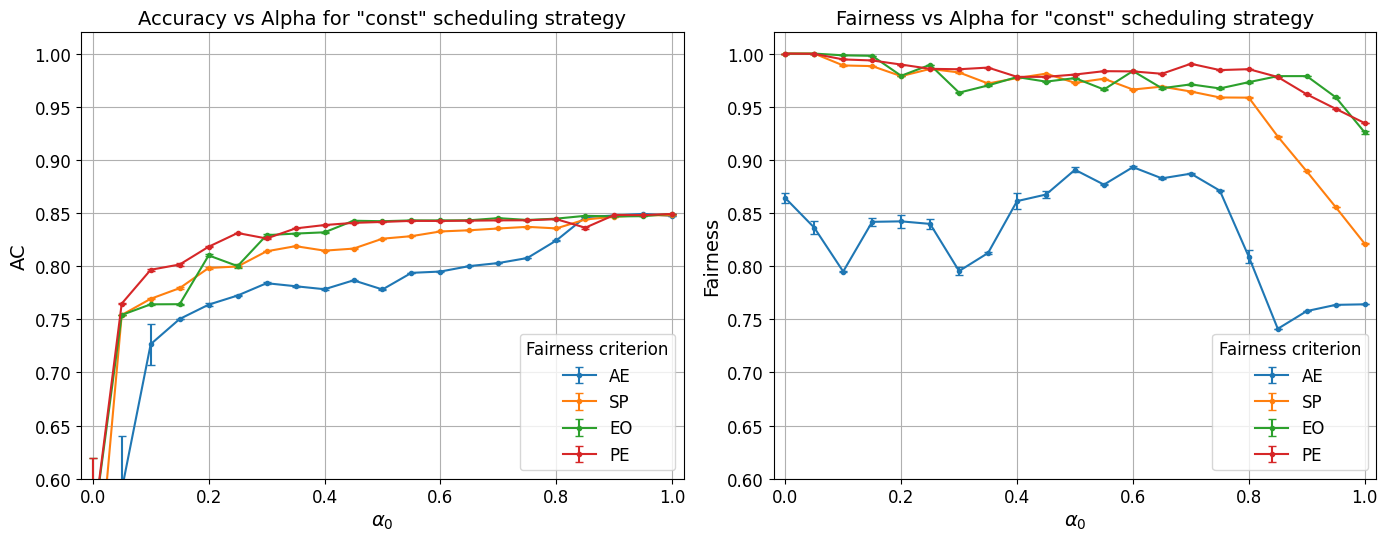

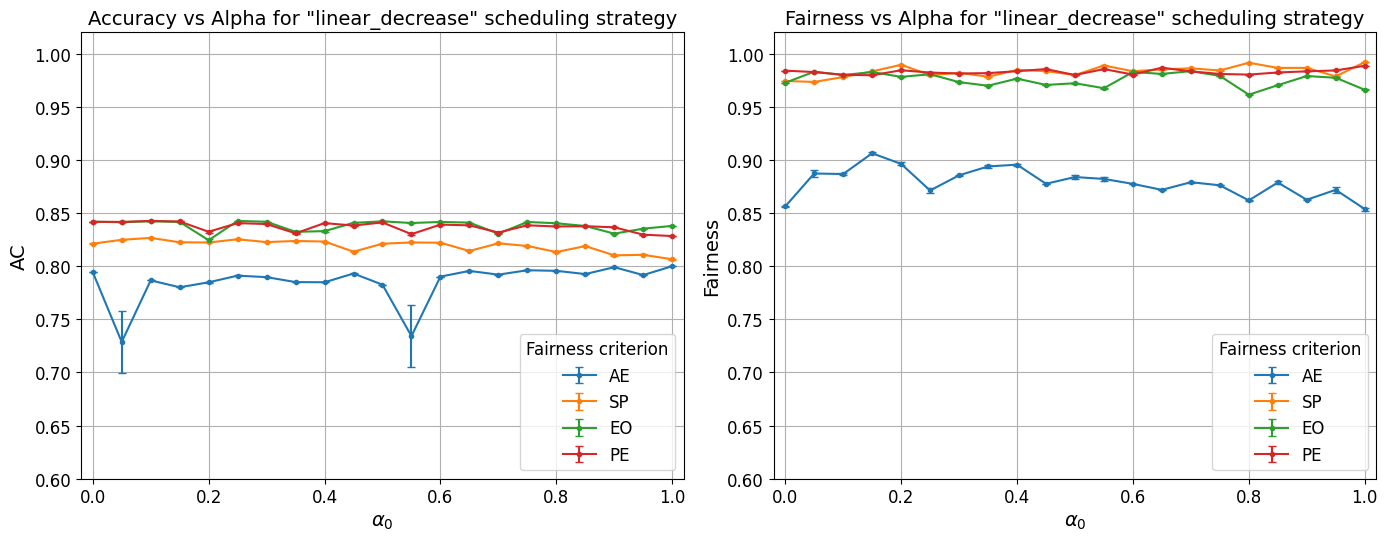

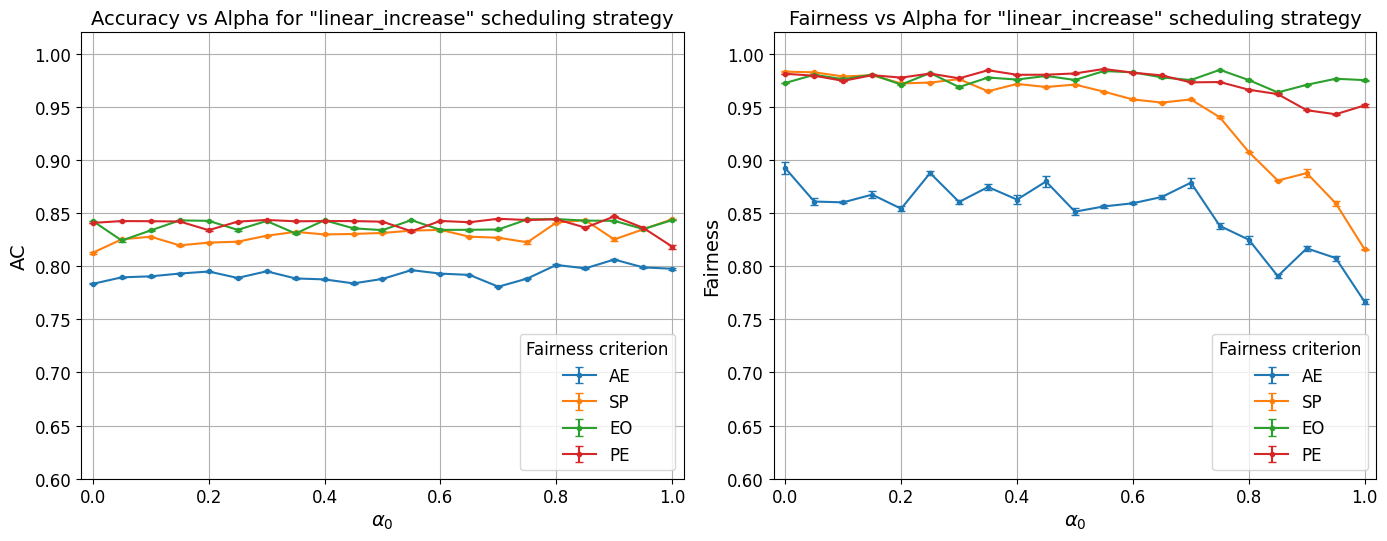

In [14]:
plot_line_charts(df, 'MLP')

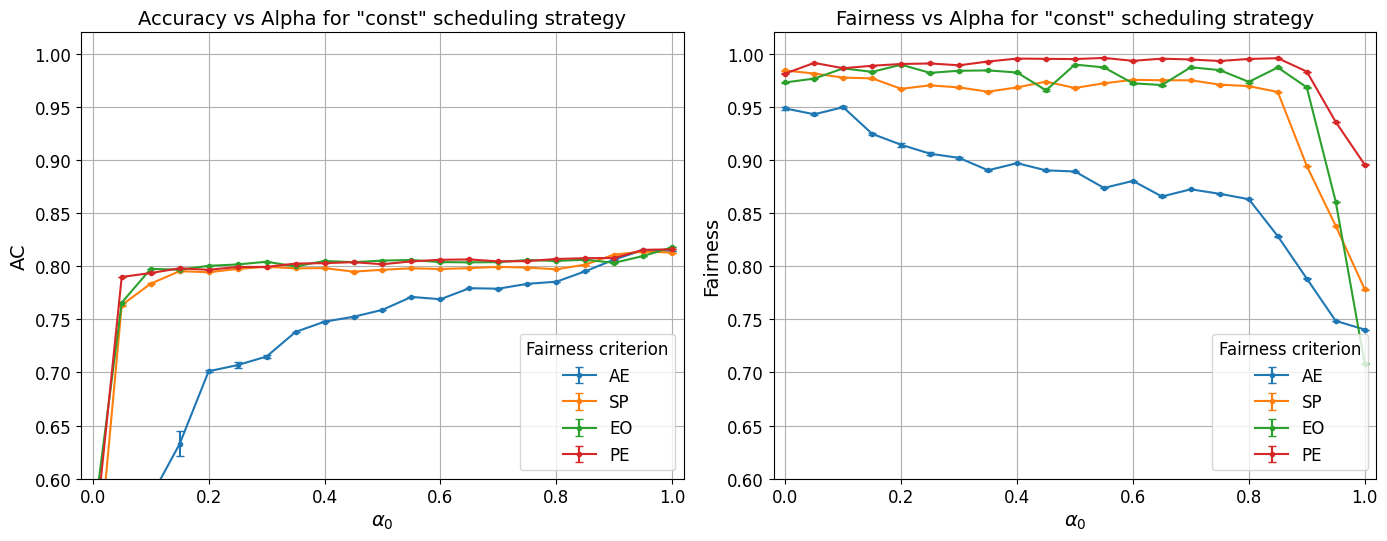

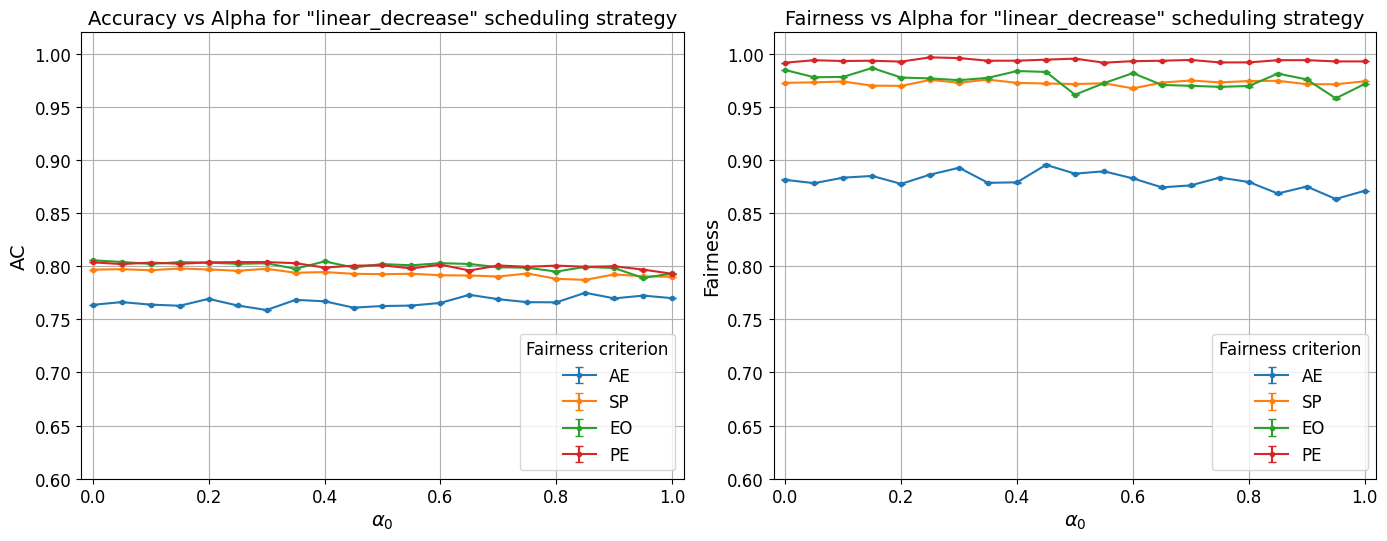

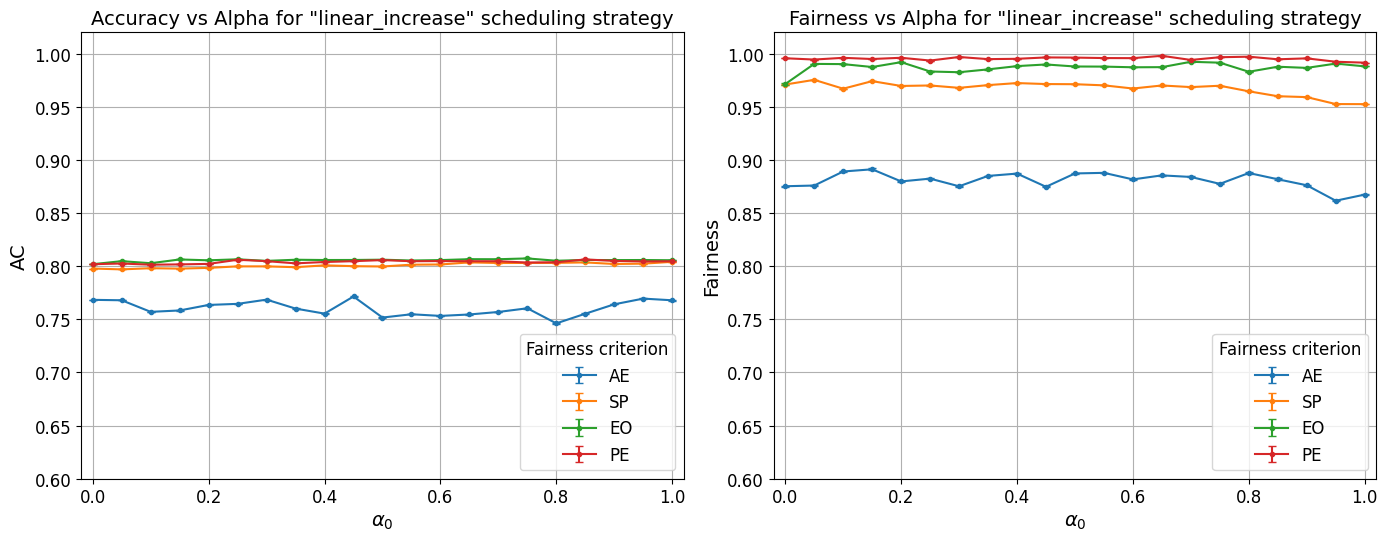

In [15]:
plot_line_charts(df, 'LR')

## Scatter plot charts with pareto fronts

In [16]:
def is_pareto_efficient(df):
    """Determine Pareto-efficient points from accuracy and fairness score."""
    data = -np.column_stack((df['test_accuracy'], df['fairness_score']))
    is_efficient = np.ones(data.shape[0], dtype=bool)

    for i, c in enumerate(data):
        if is_efficient[i]:
            is_efficient[is_efficient] = (
                np.any(data[is_efficient] < c, axis=1) |
                np.all(data[is_efficient] == c, axis=1)
            )
            is_efficient[i] = True

    return is_efficient

In [17]:
def plot_pareto_front(df, model_name):
    """Plot scatter chart for each fairness mode of a given model."""
    df_model = df[df['ml_algorithm'] == model_name].copy()
    df_model['score'] = df_model['test_accuracy'] + df_model['fairness_score']
    unique_fairness_modes = ['AE', 'SP', 'EO', 'PE']

    # Subplot
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()

    # Color palette 
    alpha_modes = df['alpha_mode'].unique()
    palette = sns.color_palette('tab10', len(alpha_modes))
    color_dict = dict(zip(alpha_modes, palette))

    for idx, mode in enumerate(unique_fairness_modes):
        ax = axes[idx]
        df_mode = df_model[df_model['fairness_mode'] == mode]

        # Drop outliers
        df_mode = df_mode[df_mode['score'] >= 1.5]

        # Pareto front calculation
        pareto_mask = is_pareto_efficient(df_mode)
        pareto_df = df_mode[pareto_mask].sort_values(by="test_accuracy")

        # Plot Pareto front
        ax.plot(
            pareto_df['test_accuracy'],
            pareto_df['fairness_score'],
            color='red',
            linewidth=2,
            zorder=2,
            label="_nolegend_"
        )
        
        # Plot points
        for alpha_mode in alpha_modes:
            df_subset = df_mode[df_mode['alpha_mode'] == alpha_mode]
            ax.scatter(
                df_subset['test_accuracy'],
                df_subset['fairness_score'],
                alpha=0.6,
                zorder=3,
                label=f"{alpha_mode}",
                color=color_dict[alpha_mode],
                s=25
            )

        ax.set_title(f"Accuracy vs Fairness for {mode}", fontsize=14)
        ax.set_xlabel("AC", fontsize=12)
        ax.set_ylabel(mode, fontsize=12)
        ax.tick_params(axis='both', labelsize=12)
        ax.grid(True)
        ax.set_xlim(0.54, 0.86)
        ax.set_ylim(0.7, 1.02)
        ax.legend(title="$\\alpha$ scheduling strategy", loc='lower left', fontsize=11, title_fontsize=11)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(os.path.join(output_dir, f"{model_name}_scatter_charts.png"), dpi=150, bbox_inches='tight')
    plt.show()

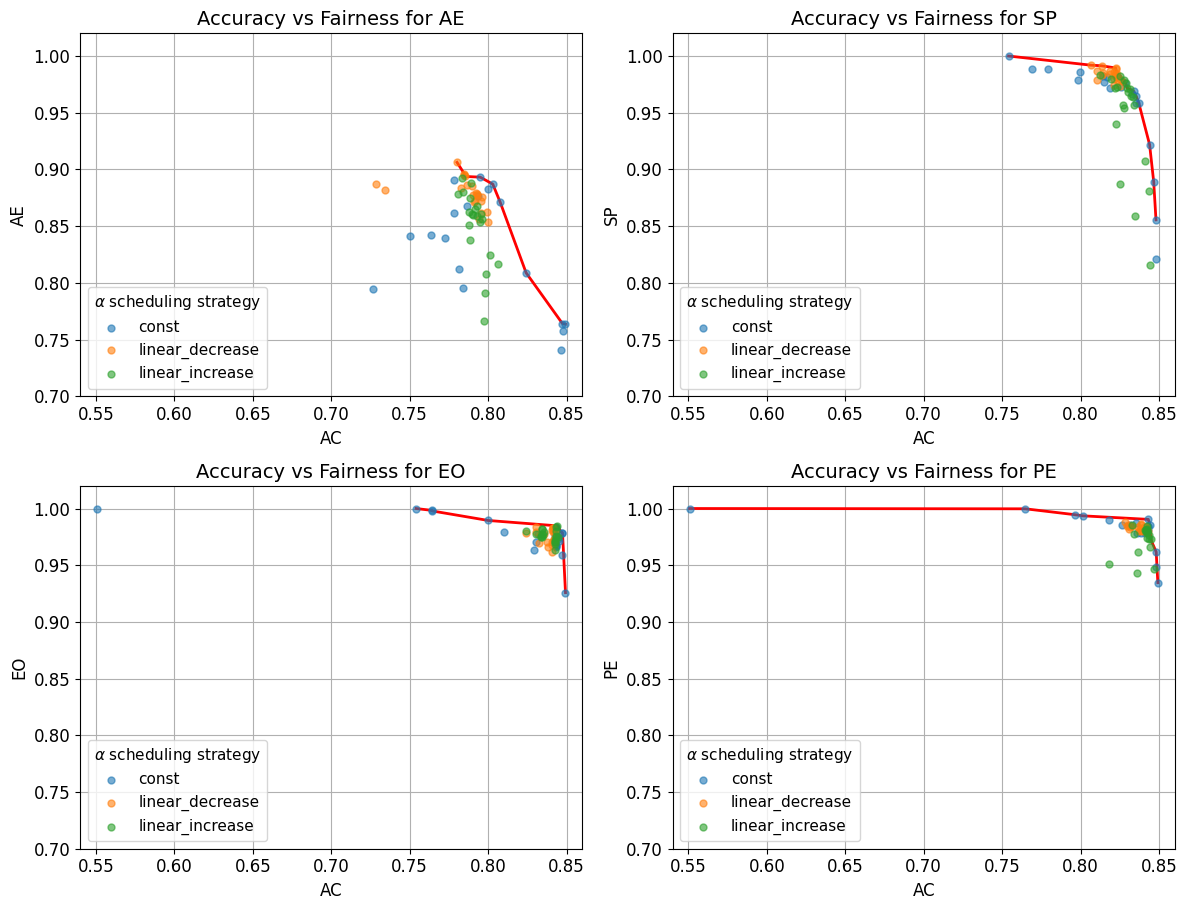

In [18]:
plot_pareto_front(df, "MLP")

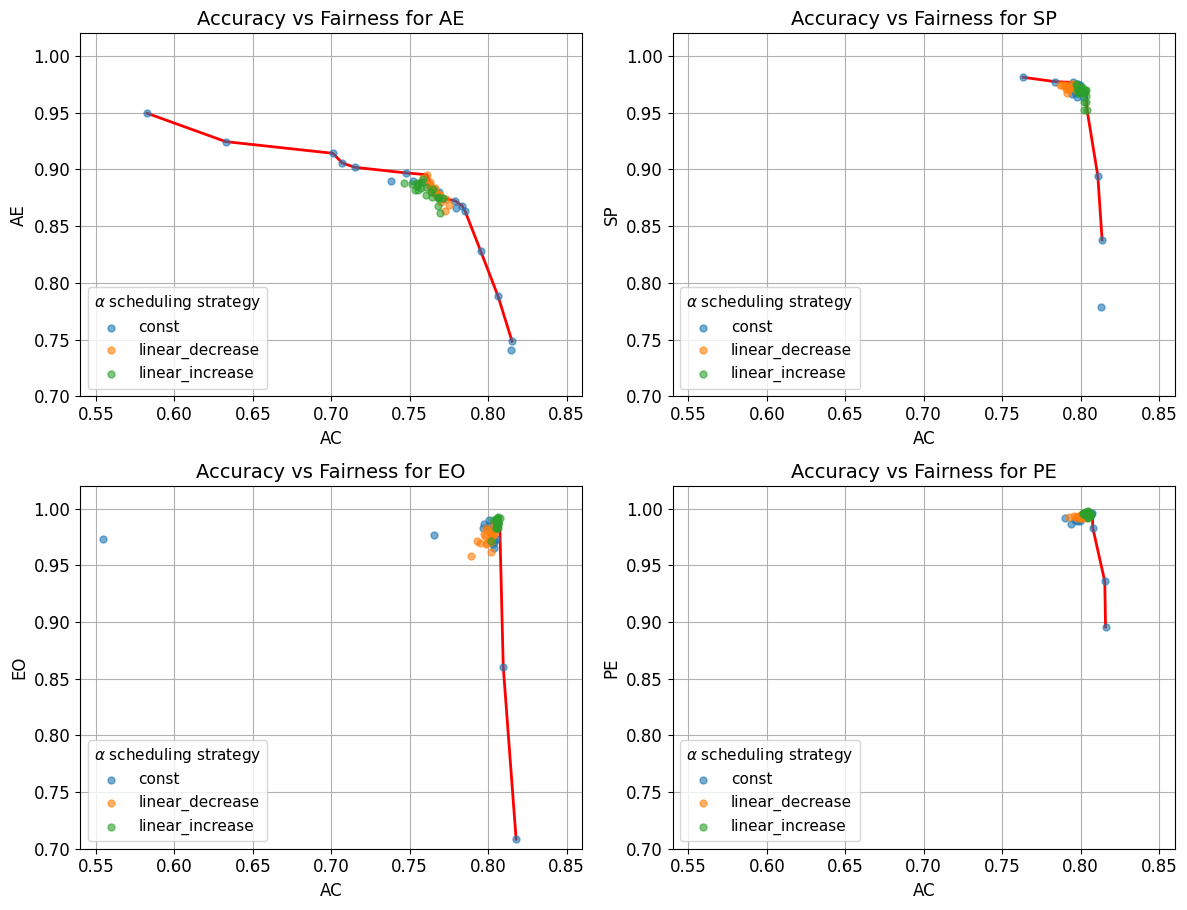

In [19]:
plot_pareto_front(df, "LR")